In [1]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
from googletrans import Translator
import pandas as pd
#!pip install torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

In [6]:
data = pd.read_excel("solofrases_200822.xlsx")
#data = data.sample(50)
data.head()

,ID,Radicado,Tipo,frase,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,272x/17,T,Las licencias ambientales se requieren para la...,NaN,NaN,NaN,NaN,NaN
1,1,272x/17,T,Las comunidades tienen el derecho de participa...,NaN,NaN,NaN,NaN,NaN
2,1,272x/17,T,La consulta previa debe exigirse si hay una af...,NaN,NaN,NaN,NaN,NaN
3,1,272x/17,T,Las comunidades deben consultarse si se afecta...,NaN,NaN,NaN,NaN,NaN
4,1,272x/17,T,"Desconcer la justicia ambiental, vulnera los d...",NaN,NaN,NaN,NaN,NaN


In [7]:
data=data[['ID','Radicado', 'Tipo', 'frase']]
data

,ID,Radicado,Tipo,frase
0,1,272x/17,T,Las licencias ambientales se requieren para la...
1,1,272x/17,T,Las comunidades tienen el derecho de participa...
2,1,272x/17,T,La consulta previa debe exigirse si hay una af...
3,1,272x/17,T,Las comunidades deben consultarse si se afecta...
4,1,272x/17,T,"Desconcer la justicia ambiental, vulnera los d..."
...,...,...,...,...
251,52,955x/03,T,"a las comunidades negras nacionales, en cuanto..."
252,52,955x/03,T,que la consulta previa con las comunidades y a...
253,52,955x/03,T,"La Sala observa, que las explotaciones foresta..."
254,52,955x/03,T,se tutelará el derecho de los accionantes a la...


In [4]:
#!pip install google_trans_new

In [5]:
#from google_trans_new import google_translator  
#translator = google_translator()  
#data['ing'] = data['frase'].apply(lambda valor: translator.translate('frase', lang_tgt='en'))
#data.head()

In [8]:
import re
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto])
    return texto

In [9]:
data['pre-procesado'] = data['frase'].apply(lambda texto: pre_procesado(texto))

In [10]:
data.head

,ID,Radicado,Tipo,frase,pre-procesado
0,1,272x/17,T,Las licencias ambientales se requieren para la...,licenci ambiental requier oper construccion ol...
1,1,272x/17,T,Las comunidades tienen el derecho de participa...,comun derech particip decision afect
2,1,272x/17,T,La consulta previa debe exigirse si hay una af...,consult previ deb exig si afect comun
3,1,272x/17,T,Las comunidades deben consultarse si se afecta...,comun deb consult si afect recurs natural
4,1,272x/17,T,"Desconcer la justicia ambiental, vulnera los d...",desconc justici ambiental vulner derech comun
...,...,...,...,...,...
251,52,955x/03,T,"a las comunidades negras nacionales, en cuanto...",comun negr nacional cuant puebl tribal reconoc...
252,52,955x/03,T,que la consulta previa con las comunidades y a...,consult previ comun asoci campesin consider pr...
253,52,955x/03,T,"La Sala observa, que las explotaciones foresta...",sal observ explot forestal adelant zon rural r...
254,52,955x/03,T,se tutelará el derecho de los accionantes a la...,tutel derech accion propied colect suel bosqu ...


In [11]:
import string
import textblob
from textblob import TextBlob
import time

In [12]:
import textblob

In [13]:
from textblob import TextBlob
import pandas as pd
import time

#Function to translate to english
def translate(x):
    try:
        blob=TextBlob(x)
        return (str(blob.translate(from_lang='es', to = 'en')))
    except: 
        return None

In [15]:
data['frase']=data.frase.astype(str) ##converting column to string where translation is required
strt_time=time.time()
data['English'] = data['frase'].apply(lambda x: translate(x)) #Translation happening
#end_time=time.time()
#print(end_time-strt_time)

In [16]:
data

,ID,Radicado,Tipo,frase,pre-procesado,English
0,1,272x/17,T,Las licencias ambientales se requieren para la...,licenci ambiental requier oper construccion ol...,Environmental licenses are required for the op...
1,1,272x/17,T,Las comunidades tienen el derecho de participa...,comun derech particip decision afect,Communities have the right to participate in d...
2,1,272x/17,T,La consulta previa debe exigirse si hay una af...,consult previ deb exig si afect comun,Prior consultation must be required if there i...
3,1,272x/17,T,Las comunidades deben consultarse si se afecta...,comun deb consult si afect recurs natural,Communities should be consulted if their natur...
4,1,272x/17,T,"Desconcer la justicia ambiental, vulnera los d...",desconc justici ambiental vulner derech comun,"Daffing environmental justice, violates the ri..."
...,...,...,...,...,...,...
251,52,955x/03,T,"a las comunidades negras nacionales, en cuanto...",comun negr nacional cuant puebl tribal reconoc...,"To the national black communities, as tribal v..."
252,52,955x/03,T,que la consulta previa con las comunidades y a...,consult previ comun asoci campesin consider pr...,that prior consultation with communities and p...
253,52,955x/03,T,"La Sala observa, que las explotaciones foresta...",sal observ explot forestal adelant zon rural r...,The Chamber observes that the forest farms tha...
254,52,955x/03,T,se tutelará el derecho de los accionantes a la...,tutel derech accion propied colect suel bosqu ...,The right of shareholders to collective proper...


In [17]:
data.to_excel('frasesTraduccion.xls')

### Análisis con Vader 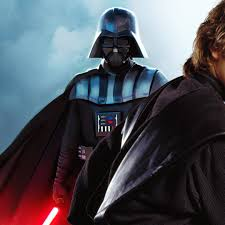

In [21]:
data1=data
data1

,ID,Radicado,Tipo,frase,pre-procesado,English
0,1,272x/17,T,Las licencias ambientales se requieren para la...,licenci ambiental requier oper construccion ol...,Environmental licenses are required for the op...
1,1,272x/17,T,Las comunidades tienen el derecho de participa...,comun derech particip decision afect,Communities have the right to participate in d...
2,1,272x/17,T,La consulta previa debe exigirse si hay una af...,consult previ deb exig si afect comun,Prior consultation must be required if there i...
3,1,272x/17,T,Las comunidades deben consultarse si se afecta...,comun deb consult si afect recurs natural,Communities should be consulted if their natur...
4,1,272x/17,T,"Desconcer la justicia ambiental, vulnera los d...",desconc justici ambiental vulner derech comun,"Daffing environmental justice, violates the ri..."
...,...,...,...,...,...,...
251,52,955x/03,T,"a las comunidades negras nacionales, en cuanto...",comun negr nacional cuant puebl tribal reconoc...,"To the national black communities, as tribal v..."
252,52,955x/03,T,que la consulta previa con las comunidades y a...,consult previ comun asoci campesin consider pr...,that prior consultation with communities and p...
253,52,955x/03,T,"La Sala observa, que las explotaciones foresta...",sal observ explot forestal adelant zon rural r...,The Chamber observes that the forest farms tha...
254,52,955x/03,T,se tutelará el derecho de los accionantes a la...,tutel derech accion propied colect suel bosqu ...,The right of shareholders to collective proper...


In [25]:
data1['sentimiento'] = data1['English'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data1

,ID,Radicado,Tipo,frase,pre-procesado,English,sentimiento
0,1,272x/17,T,Las licencias ambientales se requieren para la...,licenci ambiental requier oper construccion ol...,Environmental licenses are required for the op...,0.0000
1,1,272x/17,T,Las comunidades tienen el derecho de participa...,comun derech particip decision afect,Communities have the right to participate in d...,0.0000
2,1,272x/17,T,La consulta previa debe exigirse si hay una af...,consult previ deb exig si afect comun,Prior consultation must be required if there i...,0.0000
3,1,272x/17,T,Las comunidades deben consultarse si se afecta...,comun deb consult si afect recurs natural,Communities should be consulted if their natur...,0.2263
4,1,272x/17,T,"Desconcer la justicia ambiental, vulnera los d...",desconc justici ambiental vulner derech comun,"Daffing environmental justice, violates the ri...",0.0258
...,...,...,...,...,...,...,...
251,52,955x/03,T,"a las comunidades negras nacionales, en cuanto...",comun negr nacional cuant puebl tribal reconoc...,"To the national black communities, as tribal v...",0.0000
252,52,955x/03,T,que la consulta previa con las comunidades y a...,consult previ comun asoci campesin consider pr...,that prior consultation with communities and p...,0.0000
253,52,955x/03,T,"La Sala observa, que las explotaciones foresta...",sal observ explot forestal adelant zon rural r...,The Chamber observes that the forest farms tha...,0.0000
254,52,955x/03,T,se tutelará el derecho de los accionantes a la...,tutel derech accion propied colect suel bosqu ...,The right of shareholders to collective proper...,0.0000


In [26]:
data1[['frase', 'sentimiento']].sort_values('sentimiento')

,frase,sentimiento
238,Como la omisión de la consulta previa para oto...,-0.6908
163,prohíbe de manera general las prácticas de exp...,-0.5574
171,si de la vulneración de un derecho de esa natu...,-0.5423
203,"esta circunstancia, por sí sola, no es suficie...",-0.4939
247,la Sala concluye que existe una vulneración de...,-0.4939
...,...,...
116,la consulta popular no resulta ser un mecanism...,0.8625
235,es claro que la obligatoriedad de la licencia ...,0.8625
159,"Como consecuencia, la exploración y explotació...",0.8625
40,"los derechos en juego (debido proceso, acceso ...",0.8689


In [27]:
vader = SentimentIntensityAnalyzer()
classifier = TextClassifier.load('en-sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

2022-08-21 15:29:20,156 loading file C:\Users\villa\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [30]:
data1['sent_TextBlob'] = data1['English'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data1['sent_Vader'] = data['English'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data1['sent_flair'] = data['English'].apply(lambda valor: sent_flair(valor))

In [32]:
data1=data1[['Radicado','Tipo','frase','English','sent_TextBlob','sent_Vader','sent_flair']]
data1


,Radicado,Tipo,frase,English,sent_TextBlob,sent_Vader,sent_flair
0,272x/17,T,Las licencias ambientales se requieren para la...,Environmental licenses are required for the op...,0.000000,0.0000,0.994462
1,272x/17,T,Las comunidades tienen el derecho de participa...,Communities have the right to participate in d...,0.285714,0.0000,0.998590
2,272x/17,T,La consulta previa debe exigirse si hay una af...,Prior consultation must be required if there i...,0.000000,0.0000,0.707007
3,272x/17,T,Las comunidades deben consultarse si se afecta...,Communities should be consulted if their natur...,0.100000,0.2263,0.916786
4,272x/17,T,"Desconcer la justicia ambiental, vulnera los d...","Daffing environmental justice, violates the ri...",0.000000,0.0258,-0.999242
...,...,...,...,...,...,...,...
251,955x/03,T,"a las comunidades negras nacionales, en cuanto...","To the national black communities, as tribal v...",0.059524,0.0000,0.998793
252,955x/03,T,que la consulta previa con las comunidades y a...,that prior consultation with communities and p...,0.000000,0.0000,0.996119
253,955x/03,T,"La Sala observa, que las explotaciones foresta...",The Chamber observes that the forest farms tha...,-0.083333,0.0000,-0.859533
254,955x/03,T,se tutelará el derecho de los accionantes a la...,The right of shareholders to collective proper...,0.342857,0.0000,0.943439


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
#init_notebook_mode(connected=True)
import seaborn as sns

from collections import Counter

from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from flair.models import TextClassifier
from flair.data import Sentence

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
import PIL.Image
from IPython.display import display

In [35]:
datosSent = pd.melt(data
        , value_vars=['sent_TextBlob','sent_Vader','sent_flair'] )
datosSent.rename(columns={"variable": "Metodo", "value":"Polaridad"}, inplace=True)
datosSent.head()

,Metodo,Polaridad
0,sent_TextBlob,0.000000
1,sent_TextBlob,0.285714
2,sent_TextBlob,0.000000
3,sent_TextBlob,0.100000
4,sent_TextBlob,0.000000


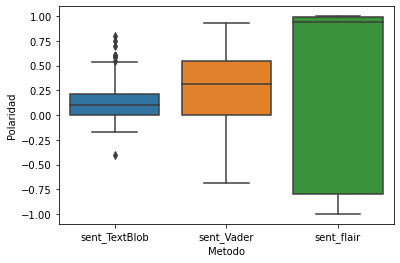

In [36]:
sns.boxplot(data=datosSent, x='Metodo', y='Polaridad')

### Cantidad de frases positivas y negativas

In [41]:
columnas = ['sent_TextBlob','sent_Vader','sent_flair']

tweetsByMethod = []

for columna in columnas:
    lista = []
    print(f"Método: {columna}")
    print(f"* Cantidad de expresiones Negativos: {len(data[data[columna]<0])}")
    print(f"* Cantidad de expresiones Positivos: {len(data[data[columna]>0])}")
    print(f"* Cantidad de expresiones Neutras: {len(data[data[columna]==0])}")
    lista.append(columna)
    lista.append(len(data[data[columna]<0]))
    lista.append(len(data[data[columna]>0]))
    lista.append(len(data[data[columna]==0]))
    print("##############")
    tweetsByMethod.append(lista)
dfTbM = pd.DataFrame(tweetsByMethod)
dfTbM.columns = ['Método', 'numNegativos', 'numPositivos', 'numNeutros']

Método: sent_TextBlob
* Cantidad de expresiones Negativos: 20
* Cantidad de expresiones Positivos: 182
* Cantidad de expresiones Neutras: 54
##############
Método: sent_Vader
* Cantidad de expresiones Negativos: 36
* Cantidad de expresiones Positivos: 175
* Cantidad de expresiones Neutras: 45
##############
Método: sent_flair
* Cantidad de expresiones Negativos: 88
* Cantidad de expresiones Positivos: 168
* Cantidad de expresiones Neutras: 0
##############


### Diagrama de barras según el tipo de sentimientos

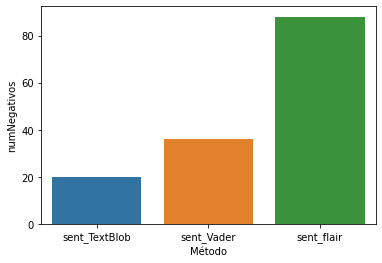

In [42]:
sns.barplot(x="Método", y ="numNegativos", data= dfTbM)

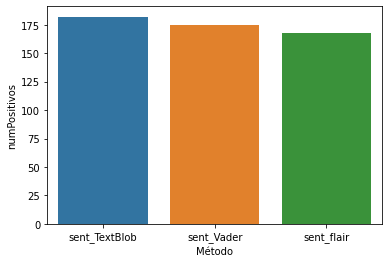

In [39]:
sns.barplot(x="Método", y ="numPositivos", data= dfTbM)

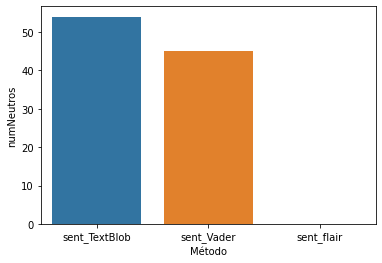

In [43]:
sns.barplot(x="Método", y ="numNeutros", data= dfTbM)

In [44]:
data.to_excel('frasesClasificacionSentimiento.xls')